# Problem Statement

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data provided contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

# Data Understanding

In this section, we will try to get an initial understanding of the data provided.

In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set required options 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
sns.set_style("whitegrid")

In [3]:
# Load the loan data from CSV
loan_data = pd.read_csv('loan.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# Load Data Dictionary
loan_data_dictionary = pd.read_excel('Data_Dictionary.xlsx')
loan_data_dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


## Dataframe Summary

Check details of the dataframe like how many rows and how many columns are present.

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


As per above the dataframe have 39717 rows with 111 columns each.

In [6]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

The summary metrics of all columns are shown above.

### Column Types

The type of each column in the original dataframe is shown below.

In [7]:
loan_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

## Check Null Value Counts

Analyse the null values in the dataframe

In [8]:
# Checking all the columns with null values
null_count = loan_data.isnull().sum()
null_count[null_count > 0].sort_values(ascending=False)

bc_open_to_buy                    39717
acc_open_past_24mths              39717
bc_util                           39717
mo_sin_old_il_acct                39717
mo_sin_old_rev_tl_op              39717
mo_sin_rcnt_rev_tl_op             39717
mo_sin_rcnt_tl                    39717
mort_acc                          39717
mths_since_recent_bc              39717
mths_since_recent_bc_dlq          39717
mths_since_recent_inq             39717
mths_since_recent_revol_delinq    39717
num_accts_ever_120_pd             39717
num_actv_bc_tl                    39717
num_actv_rev_tl                   39717
num_bc_sats                       39717
num_bc_tl                         39717
num_il_tl                         39717
num_op_rev_tl                     39717
num_rev_accts                     39717
num_rev_tl_bal_gt_0               39717
num_sats                          39717
num_tl_120dpd_2m                  39717
num_tl_30dpd                      39717
num_tl_90g_dpd_24m                39717


# Data Cleanup

In this section we will clean up the data.

## Missing Value Handline

Drop columns and rows which are having significant number of missing values.

### Drop Null Columns
We have seen above that few of the rows have significant number of null values. We can drop these columns as these won't add any meaningful information to our analysis. We will consider the columns having only less than 60% values as null.

Columns having more than 60% rows having null values are below

In [9]:
missing_values = round((loan_data.isnull().sum()/len(loan_data.id))*100, 2)
missing_values_60_percent = missing_values[missing_values>60].sort_values(ascending=False)
missing_values_60_percent

mo_sin_old_il_acct                100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_rcnt_tl                    100.00
mort_acc                          100.00
mths_since_recent_bc              100.00
mths_since_recent_bc_dlq          100.00
mths_since_recent_inq             100.00
mths_since_recent_revol_delinq    100.00
num_accts_ever_120_pd             100.00
num_actv_bc_tl                    100.00
num_actv_rev_tl                   100.00
num_bc_sats                       100.00
num_bc_tl                         100.00
num_il_tl                         100.00
num_op_rev_tl                     100.00
num_rev_accts                     100.00
num_rev_tl_bal_gt_0               100.00
num_sats                          100.00
num_tl_120dpd_2m                  100.00
num_tl_30dpd                      100.00
num_tl_90g_dpd_24m                100.00
num_tl_op_past_12m                100.00
pct_tl_nvr_dlq                    100.00
percent_bc_gt_75                  100.00
tot_hi_cred_lim 

We can safely drop the above columns as majority of the values are null and hence won't give any useful insights during analysis.

In [10]:
loan_data = loan_data.drop(missing_values_60_percent.index, axis=1)
print('Dropped %d columns' % len(missing_values_60_percent.index.to_list()))

Dropped 57 columns


Verify that the missing values in columns is less than 60%

In [11]:
missing_values = round((loan_data.isnull().sum()/len(loan_data.id))*100, 2)
missing_values = pd.DataFrame(missing_values[missing_values>0], columns=["missing_value_percentage"])
missing_values.sort_values(by=["missing_value_percentage"], ascending=False)

,missing_value_percentage
desc,32.58
emp_title,6.19
emp_length,2.71
pub_rec_bankruptcies,1.75
last_pymnt_d,0.18
collections_12_mths_ex_med,0.14
chargeoff_within_12_mths,0.14
revol_util,0.13
tax_liens,0.10
title,0.03


### Drop Columns Having Same Value for All Rows

Some of the columns would be having same value for all the rows and hence not useful for analysis. These columns can be dropped.

In [12]:
columns_with_unique_value_counts = loan_data.nunique().sort_values(ascending=True)
columns_with_unique_value_counts

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

Any columns with only one value can be dropped.

Below check shows the columns with single values.

In [13]:
# Finding columns with unique values
columns_with_single_value = columns_with_unique_value_counts[columns_with_unique_value_counts == 1]
print(columns_with_single_value)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
initial_list_status           1
collections_12_mths_ex_med    1
pymnt_plan                    1
dtype: int64


The above columns can be dropped from the dataframe as they are having a single value for all rows

In [14]:
# Dropping columns with unique values
loan_data = loan_data.drop(columns=columns_with_single_value.index)
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00

### Drop Null Rows

If any rows are having all values as null, we can drop those columns

In [15]:
# Checking how many rows are having all columns as null
loan_data.isnull().all(axis=1).sum()

0

We don't have any rows having all columns as null. So no need to drop any rows as part of this check.

## Standardising Values

Some fields would be having invalid values, which would make it difficult to analyze. We will clean this up in this section.

We can start by checking the type of each column

In [16]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

### Column - term

In [17]:
loan_data['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

As seen in the value counts, terms is number of months. We can convert the value to integers. The column can also be renamed to indicate that it is number of months.

In [18]:
loan_data['term'] = loan_data['term'].apply(lambda x: int(str(x).replace(' months', '')))
loan_data = loan_data.rename(columns={'term': 'term_in_months'})
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Column - int_rate

Interest rate is a percentage value, but since the percentage symbol is present, its stored as an object. We can remove the percentage and convert to float.

In [19]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: float(str(x).replace('%', '')))

### Column - emp_length

This column indicates how many years of work experience the borrower have. We will start by checking the distinct values.

In [20]:
emp_length_counts = loan_data['emp_length'].value_counts(dropna=False)
emp_length_counts

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

#### Handle NaN
We can see that there are few NaN values for few rows. These have to be corrected. This could be because the the employment information is not available, or the person have no experience. We cannot confirm on this and we can drop the NaN rows if the number of rows dropped is not too high. 

First we will check the percentage of rows having NaN.

In [21]:
round(emp_length_counts[np.NaN] * 100 / len(loan_data['emp_length']), 2)

2.71

Since the number of rows are only 2.71% we can drop it and pick only the accurate rows for analysis.

In [22]:
loan_data = loan_data[~loan_data['emp_length'].isna()]
loan_data.shape

(38642, 45)

#### Convert Experiences to Int

We can convert the employment length to numeric value, representing the number of years. For 10+ we will provide the value as 10 and for <1 we will provide the value as 0.

In [23]:
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: int(str(x).replace(' years', '').replace(' year', '').replace('< 1', '0').replace('10+', '10')))
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Columns - issue_d

These is a date column. The month and year can be extracted from this column.

In [24]:
loan_data['issue_d'] = loan_data['issue_d'].apply(pd.to_datetime, format='%b-%y')
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_month'] = loan_data['issue_d'].dt.month
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,2011,12
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,2011,12
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,2011,12
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,2011,12
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,2011,12


## Filter Data

### Deduplicate Rows

If there are any duplicate rows in the dataset, these can result in incorrect results during analysis and these rows can hence be dropped. In the current dataset, all rows are having an id column. We can check the duplicates in id field to check this.

In [25]:
loan_data['id'].duplicated().sum()

0

As per the check above, there are no duplicate rows. Hence nothing need to be dropped.

### Exclude loan_status = Current

We can filter out rows where loan_status is Current. If the status is current, we are not yet sure whether the borrower is going to default or not. So these rows won't help in analysis.

In [26]:
existing_row_count = len(loan_data)
loan_data = loan_data[loan_data['loan_status'] != 'Current']
current_row_count = len(loan_data)
print('Dropped %d rows' % (existing_row_count - current_row_count))

Dropped 1098 rows


### Exclude Irrelavant Columns

The columns available are:

In [27]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       37544 non-null  int64         
 1   member_id                37544 non-null  int64         
 2   loan_amnt                37544 non-null  int64         
 3   funded_amnt              37544 non-null  int64         
 4   funded_amnt_inv          37544 non-null  float64       
 5   term_in_months           37544 non-null  int64         
 6   int_rate                 37544 non-null  float64       
 7   installment              37544 non-null  float64       
 8   grade                    37544 non-null  object        
 9   sub_grade                37544 non-null  object        
 10  emp_title                36136 non-null  object        
 11  emp_length               37544 non-null  int64         
 12  home_ownership           37544 n

The columns that can be dropped are:
* id: Id is a unique value which identify a loan. No information can be derived from id.
* member_id: Unique value to identify a person. No information can be derived from member_id.
* funded_amnt: This is a value determined after the loan is approved. Hence its not useful to predict if the borrower will default.
* funded_amnt_inv: This is a value determined after the loan is approved. Hence its not useful to predict if the borrower will default.
* emp_title: This is a title of the person with regard to work. This has too many values to be for categorizing and there is no standard way to combine or compare two titles of people from different work streams.
* title: This is the loan title. This is again a description and it would be difficult to use this to find patterns.
* url: This is not a useful field as url only has an id field which is differing across rows. This id field cannot provide any relevant info.
* desc: This is a general description of the loan. This cannot be used for classifications. Purpose is a more standard and is similar to desc.
* zip_code: This field is masked. Hence cannot be used.
* sub_grade: This field is too granular. grade would be sufficient for analysis.
* Below attributes are affected by whether the loan is approved or not. Hence these cannot be relied on for analysis:
    * revol_bal
    * revol_util
    * out_prncp
    * out_prncp_inv
    * total_pymnt
    * total_pymnt_inv
    * total_rec_prncp
    * total_rec_int
    * total_rec_late_fee
    * collection_recovery_fee
    * last_pymnt_d
    * last_pymnt_amnt
    * last_credit_pull_d
    * earliest_credit_line

In [30]:
columns_to_be_dropped = [
    'id',
    'member_id',
    'funded_amnt',
    'funded_amnt_inv',
    'emp_title',
    'title',
    'url',
    'desc',
    'zip_code',
    'sub_grade',
    'revol_bal',
    'revol_util',
    'out_prncp',
    'out_prncp_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'collection_recovery_fee',
    'total_pymnt',
    'total_pymnt_inv',
    'earliest_cr_line',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d'
]
loan_data = loan_data.drop(columns=columns_to_be_dropped)
loan_data

KeyError: "['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'emp_title', 'title', 'url', 'desc', 'zip_code', 'sub_grade', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee', 'total_pymnt', 'total_pymnt_inv', 'earliest_cr_line', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'] not found in axis"

## Misc Corrections
Once the data is filtered, few more minor corrections can be done.

### Update Missing Values
Find and fix the missing values

In [31]:
loan_data.isnull().sum()

loan_amnt                 0
term_in_months            0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
total_acc                 0
recoveries                0
pub_rec_bankruptcies    697
issue_year                0
issue_month               0
dtype: int64

We can see that only pub_rec_bankruptcies is having missing values. These could be because there are no bankruptcy record found for the borrower, meaning it would be zero. We can default the nulls as zero here.

In [32]:
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].fillna(0).astype(int)
loan_data.head()

,loan_amnt,term_in_months,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,recoveries,pub_rec_bankruptcies,issue_year,issue_month
0,5000,36,10.65,162.87,B,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1,3,0,9,0.00,0,2011,12
1,2500,60,15.27,59.83,C,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,5,3,0,4,117.08,0,2011,12
2,2400,36,15.96,84.33,C,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2,2,0,10,0.00,0,2011,12
3,10000,36,13.49,339.31,C,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1,10,0,37,0.00,0,2011,12
5,5000,36,7.90,156.46,A,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,3,9,0,12,0.00,0,2011,12


# Handling Outliers

For each column, check if there are outliers and remove the outliers for more accurate analysis.

In [33]:
# IQR
def drop_outliers(dataframe, column):
    perc75 = dataframe[column].quantile(0.75)
    print('75th Percentile: %f' % perc75)
    perc25 = dataframe[column].quantile(0.25)
    print('25th Percentile: %f' % perc25)
    iqr = perc75-perc25
    print('IQR: %f' % iqr)
    lower_bound = perc25 - iqr * 1.5
    print('Lower Bound: %f' % lower_bound)
    upper_bound = perc75 + iqr * 1.5
    print('Upper Bound: %f' % upper_bound)
    current_rows = len(dataframe)
    dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    print('Dropped %s rows' % (current_rows - len(dataframe)))
    return dataframe    

## loan_amount

<Axes: >

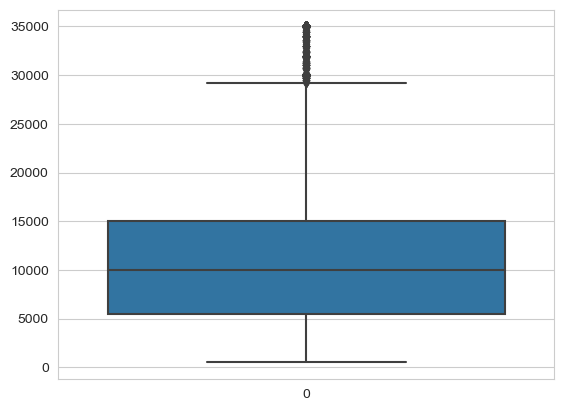

In [34]:
sns.boxplot(loan_data['loan_amnt'])

In [35]:
loan_data = drop_outliers(loan_data, 'loan_amnt')

75th Percentile: 15000.000000
25th Percentile: 5500.000000
IQR: 9500.000000
Lower Bound: -8750.000000
Upper Bound: 29250.000000
Dropped 1078 rows


<Axes: >

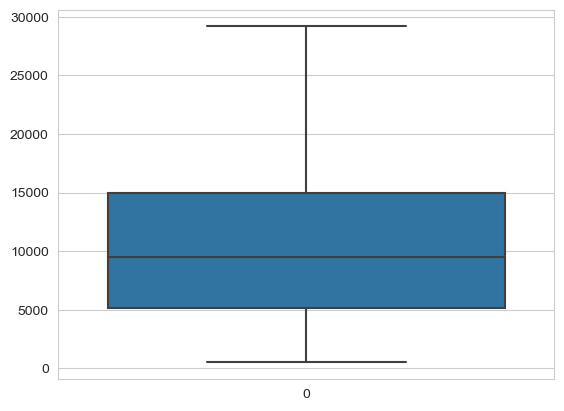

In [36]:
sns.boxplot(loan_data['loan_amnt'])

### int_rate

We can start by a box plot on interest rate to understand the range of values

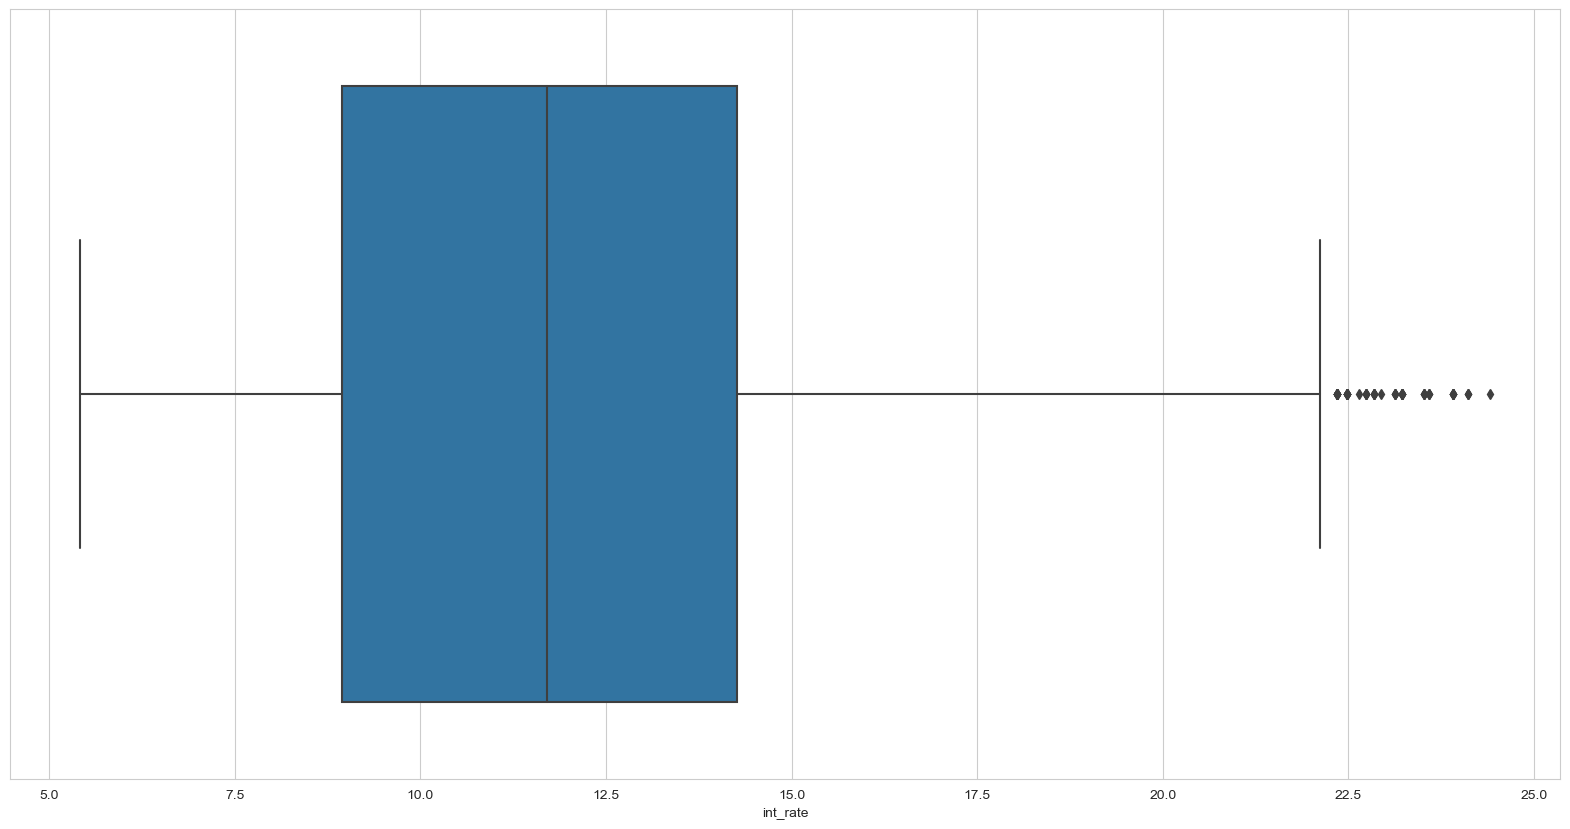

In [67]:
plt.figure(figsize=(20, 10 ))
sns.boxplot(data=loan_data, x='int_rate')
plt.show()

In [ ]:
The above column has few outliers which can be removed

In [70]:
loan_data = drop_outliers(loan_data, 'int_rate')

75th Percentile: 14.270000
25th Percentile: 8.940000
IQR: 5.330000
Lower Bound: 0.945000
Upper Bound: 22.265000
Dropped 66 rows


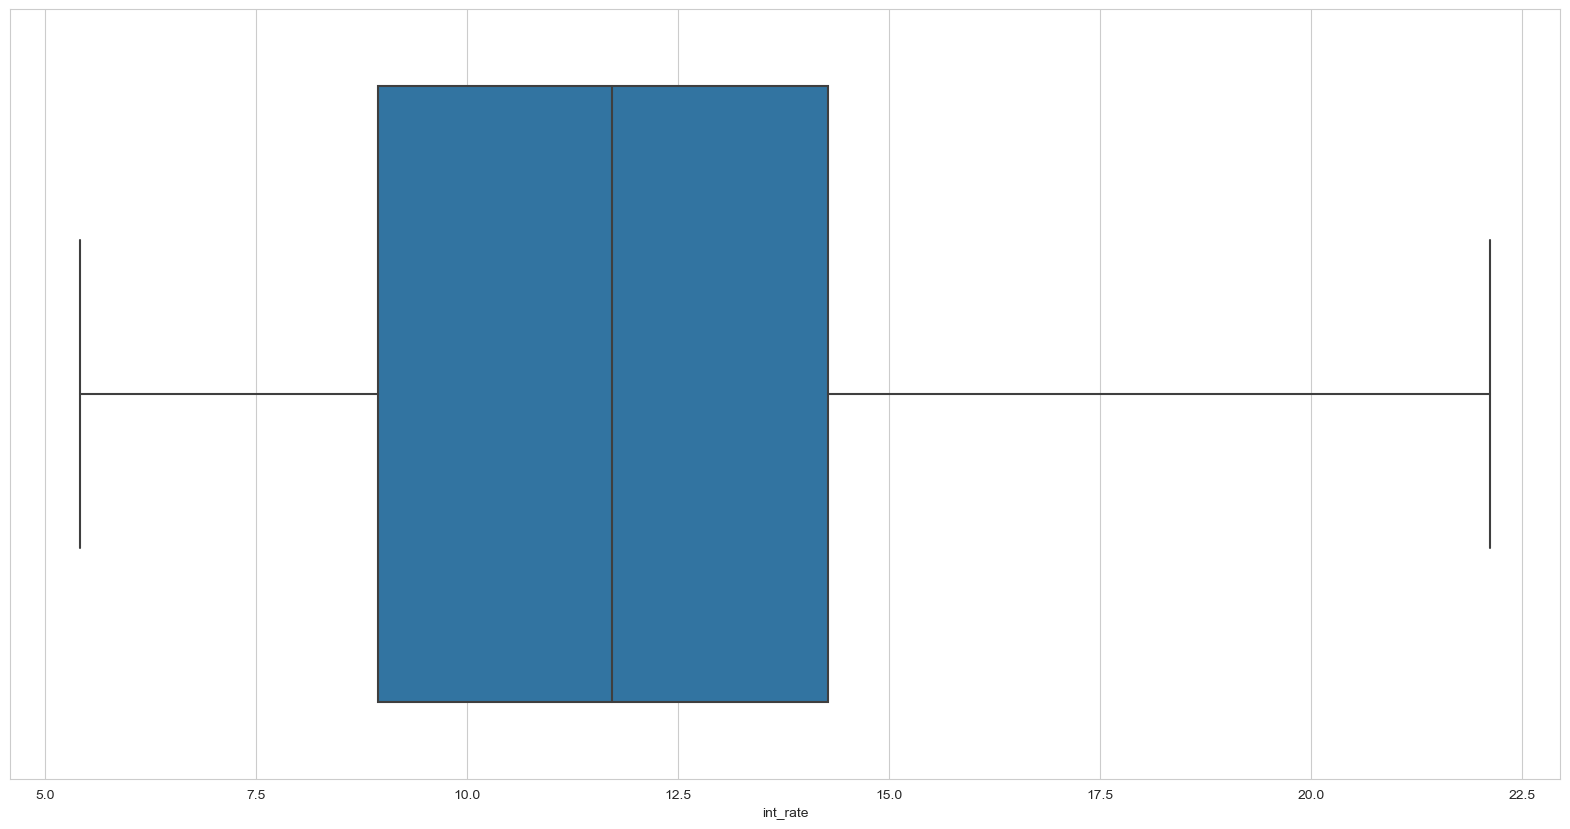

In [71]:
plt.figure(figsize=(20, 10 ))
sns.boxplot(data=loan_data, x='int_rate')
plt.show()

# Univariate Analysis

## Unordered Categorical Variables

We will try to plot some histograms and try to extract some useful information from the below categorical variables.

* home_ownership
* purpose
* addr_state

In [37]:
def plot_percentage_graph(dataframe, group_by_col, annot=True) :
    grouped_df = dataframe.groupby(by=group_by_col)['loan_status'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    g = sns.catplot(x=group_by_col,y='Percentage',hue='loan_status',kind='bar',data=grouped_df)
    g.ax.set_ylim(0,110)

    if annot:
        for p in g.ax.patches:
            txt = str( p.get_height().round(2)) + '%'
            txt_x = p.get_x()
            txt_y = p.get_height()
            g.ax.text(txt_x,txt_y,txt)

In [38]:
def plot_percentage_bar(dataframe, group_by_col, vertical=False, figsize=(20,10), order_by_percentage=True) :
    fig, ax = plt.subplots(figsize=figsize)
    grouped_df = dataframe.groupby(by=group_by_col)['loan_status'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    grouped_df = grouped_df.sort_values(['loan_status', 'Percentage'], ascending=[False, False])
    if order_by_percentage:
        order = grouped_df[group_by_col].drop_duplicates()
        sns.barplot(x=group_by_col,y='Percentage',hue='loan_status',data=grouped_df, ax=ax, order=order)
    else:
        sns.barplot(x=group_by_col,y='Percentage',hue='loan_status',data=grouped_df, ax=ax)
    for p in ax.patches:
        txt = str( p.get_height().round(2)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()
        if vertical:
            ax.text(txt_x,txt_y,txt, rotation=90)
        else:
            ax.text(txt_x,txt_y,txt)

### home_ownership

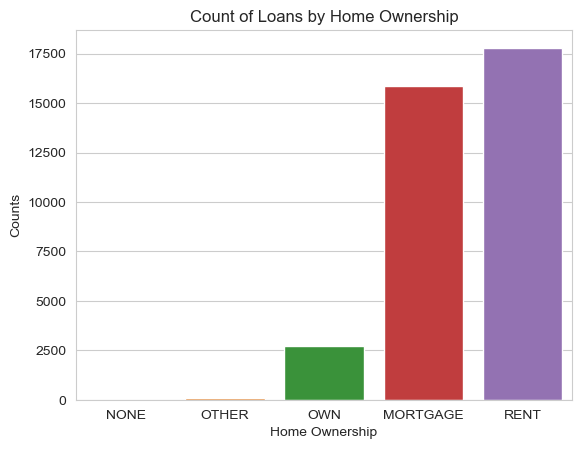

In [39]:
sns.countplot(data=loan_data, x='home_ownership', order=['NONE', 'OTHER', 'OWN', 'MORTGAGE', 'RENT'])
plt.title('Count of Loans by Home Ownership')
plt.xlabel("Home Ownership")
plt.ylabel("Counts")
plt.show()

Majority of borrowers RENT a home.

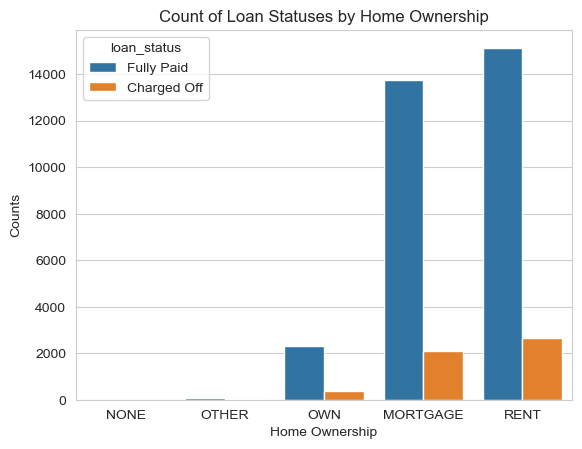

In [40]:
sns.countplot(data=loan_data, x='home_ownership', hue='loan_status', order=['NONE', 'OTHER', 'OWN', 'MORTGAGE', 'RENT'])
plt.title('Count of Loan Statuses by Home Ownership')
plt.xlabel("Home Ownership")
plt.ylabel("Counts")
plt.show()

From the above plot, we can see that those who OWNS home takes only few loans and those who defaults are also less. There are high number of borrowers who RENTs their home who defaults.

<Figure size 2000x1000 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


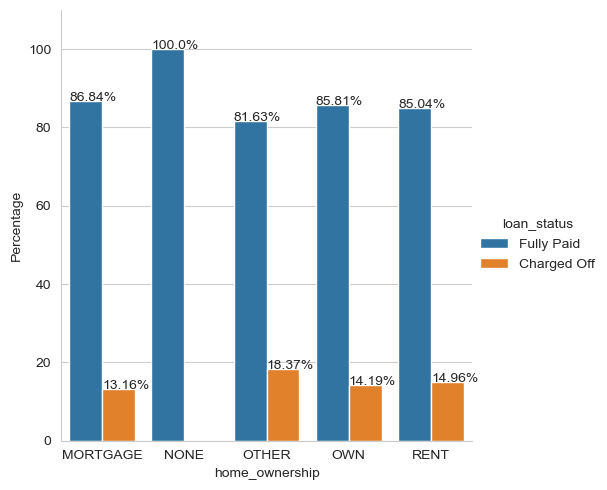

In [41]:
plt.figure(figsize=(20,10))
plot_percentage_graph(loan_data, 'home_ownership')
plt.show()

Based on the above percentages, those who are having house ownership of OTHER have the highest chance of defaulting.

### purpose

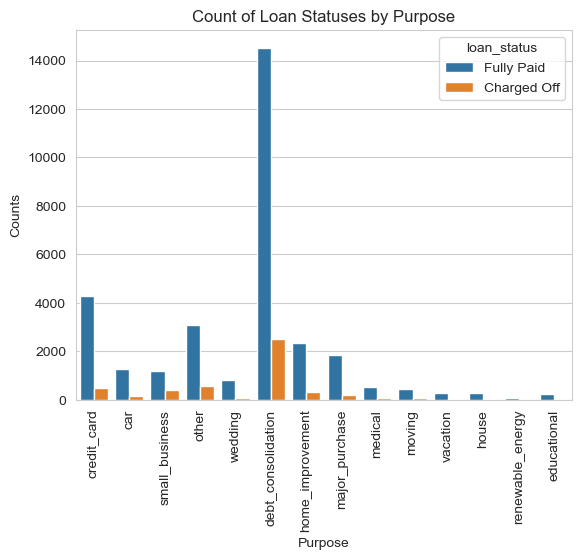

In [42]:
### purpose
sns.countplot(data=loan_data, x='purpose', hue='loan_status')
plt.xticks(rotation=90)
plt.title('Count of Loan Statuses by Purpose')
plt.xlabel("Purpose")
plt.ylabel("Counts")
plt.show()

From the above, those borrowers who take loans for Debt Consolidation have high number of defaulters.

<Figure size 2000x1000 with 0 Axes>

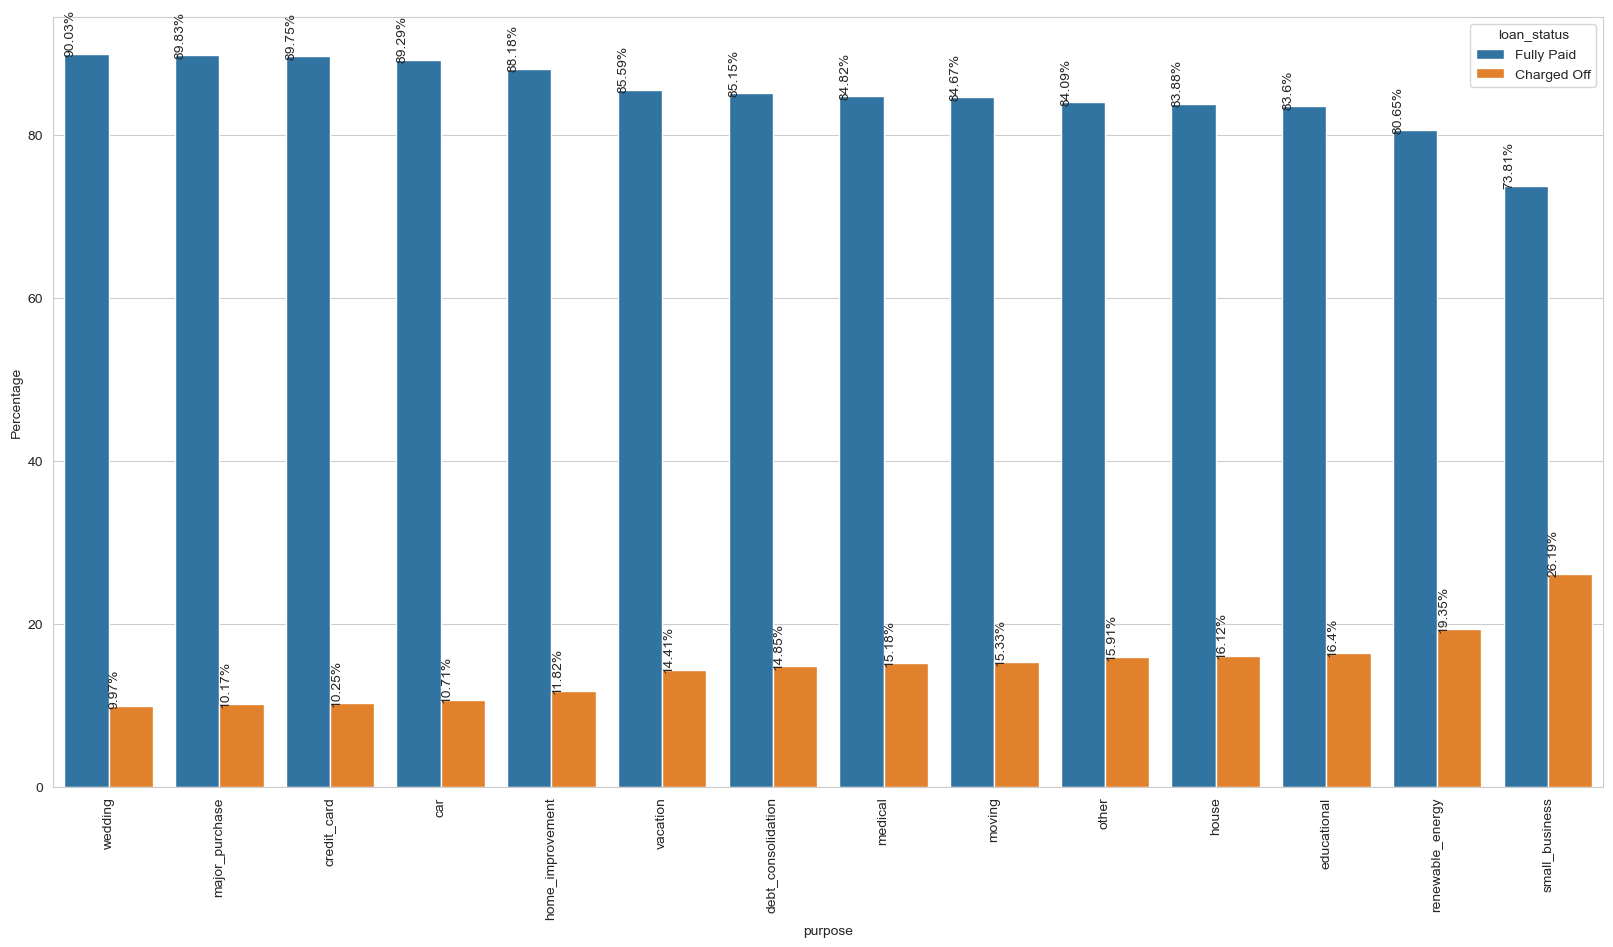

In [43]:
plt.figure(figsize=(20,10))
plot_percentage_bar(loan_data, 'purpose', vertical=True)
plt.xticks(rotation=90)
plt.show()

Borrowers who take loans for Small Business have a higher chance of defaulting compared to other purposes.

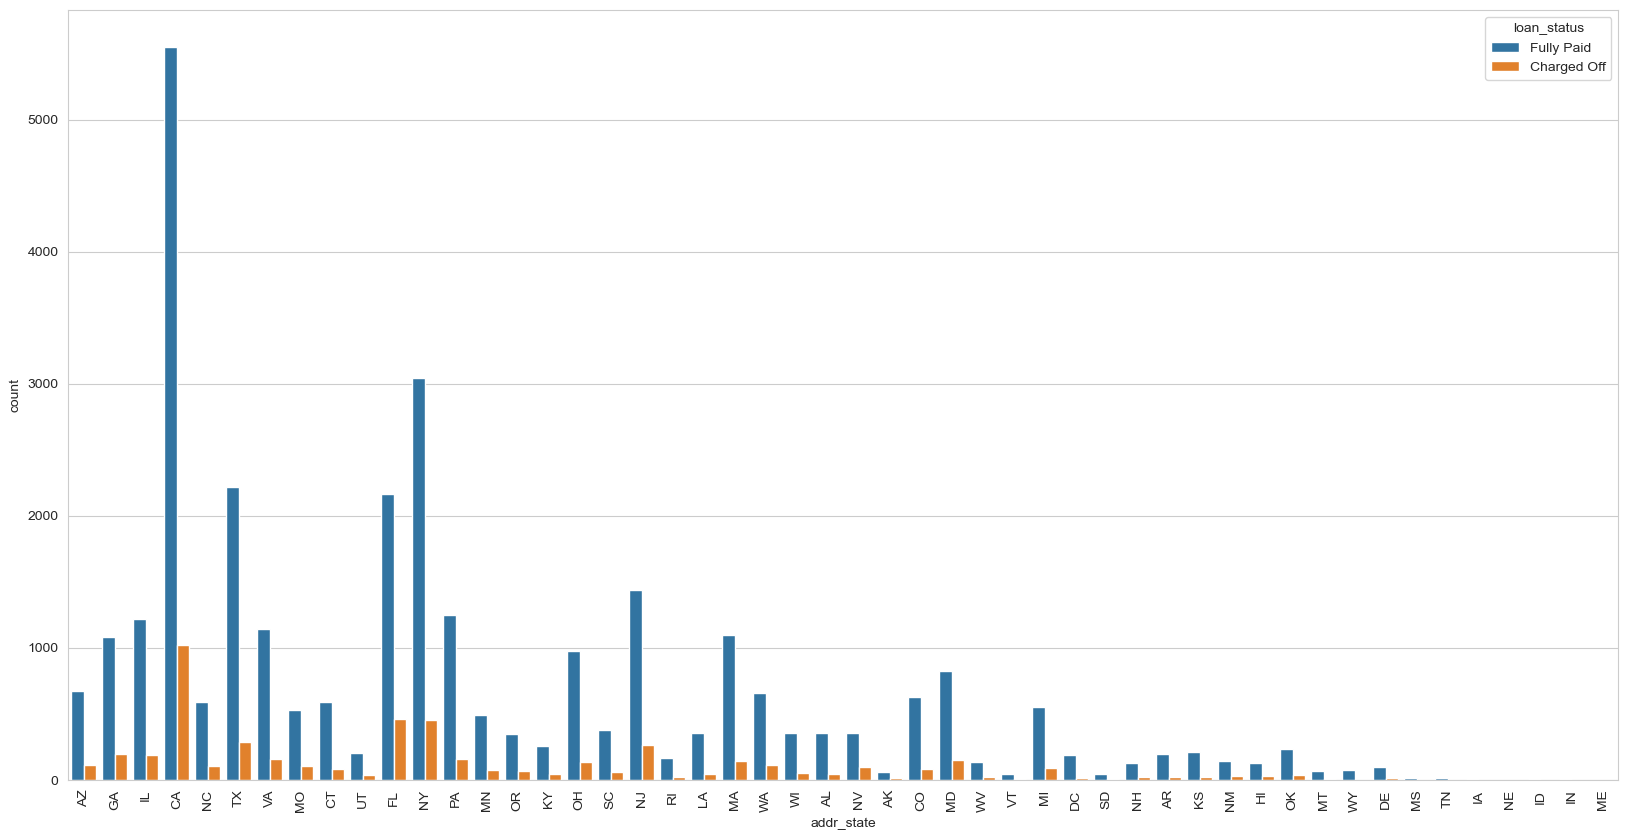

In [44]:
# addr_state
plt.figure(figsize=(20,10))
sns.countplot(data=loan_data, x='addr_state', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

From the above, those borrowers who are from CA (California) have high chances of defaulting

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


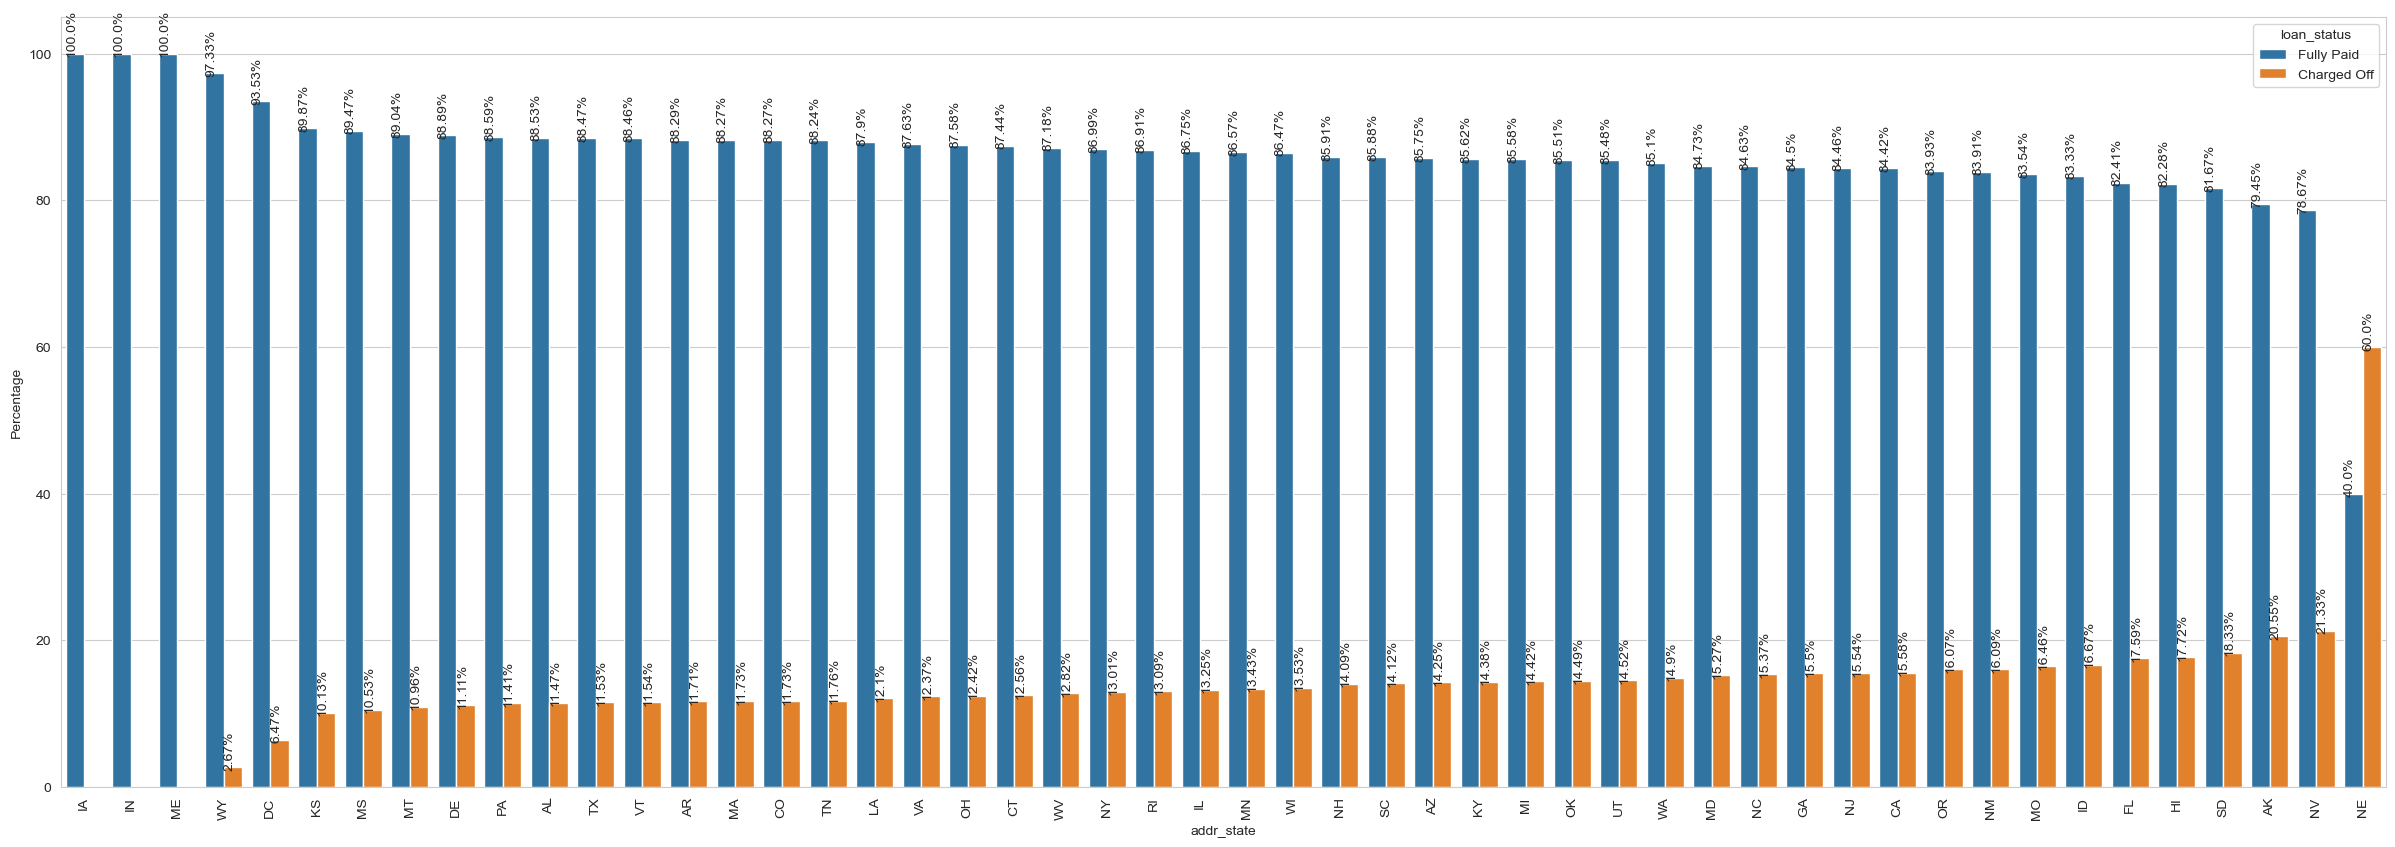

In [45]:
plot_percentage_bar(loan_data, 'addr_state', vertical=True, figsize=(30, 10))
plt.xticks(rotation=90)
plt.show()

## Ordered Categorical Variable
* term_in_months - this can be a continuos variable, but can be used for categorising as we have only two values
* grade
* emp_length
* issue_year
* issue_month

In [46]:
### term_in_months

<Axes: xlabel='term_in_months', ylabel='count'>

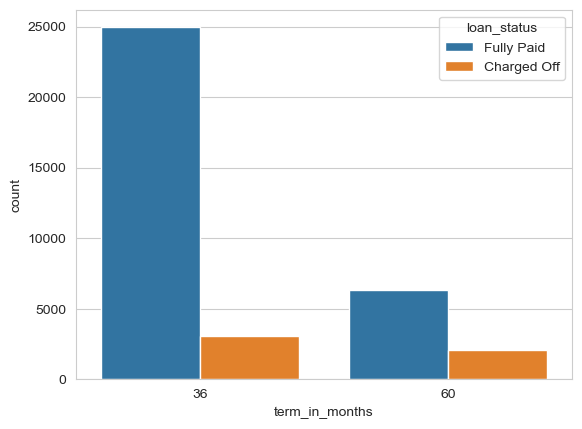

In [47]:
sns.countplot(data=loan_data, x='term_in_months', hue='loan_status')

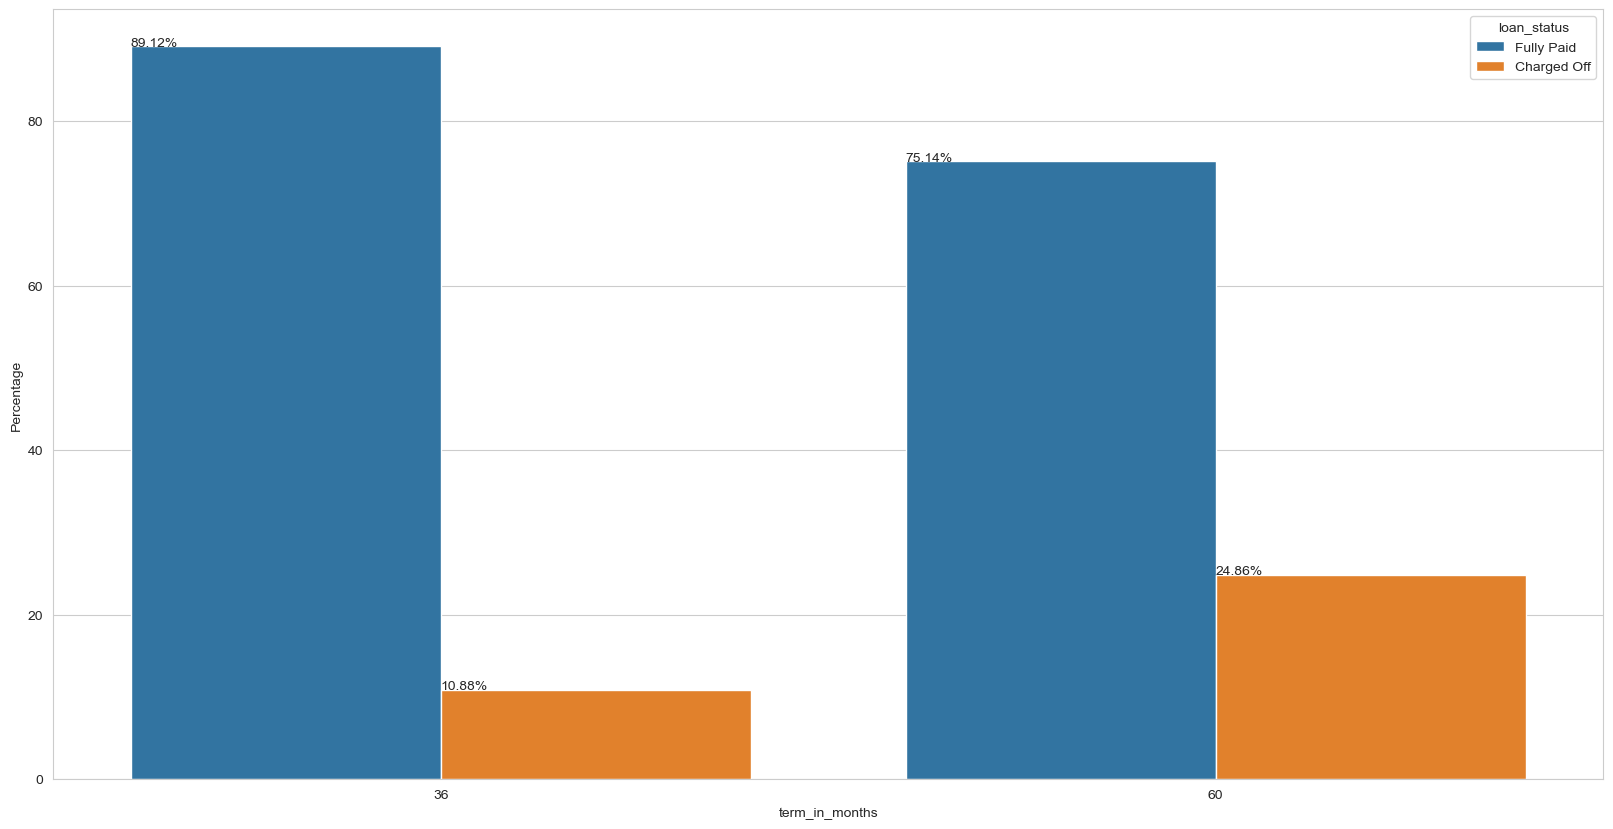

In [48]:
plot_percentage_bar(loan_data, 'term_in_months')


From the above graphs we can observe that the risk of defaulting increases if the tenure increases.

### grade

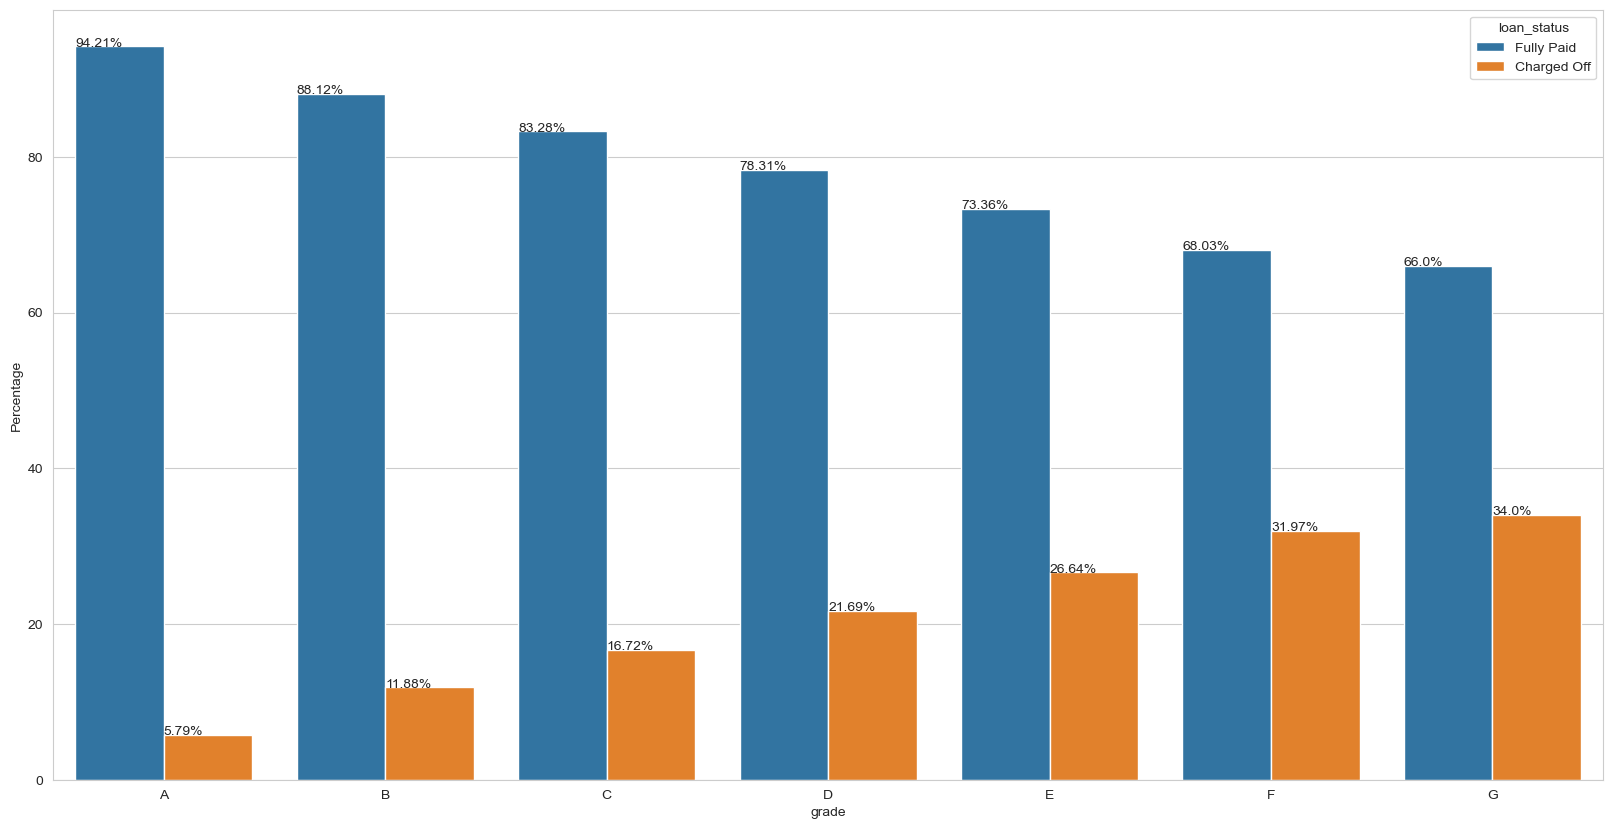

In [49]:
plot_percentage_bar(loan_data, 'grade')

From the above plot, we can see that the chance of defaulting increases as grade goaes from A to G.

### emp_length

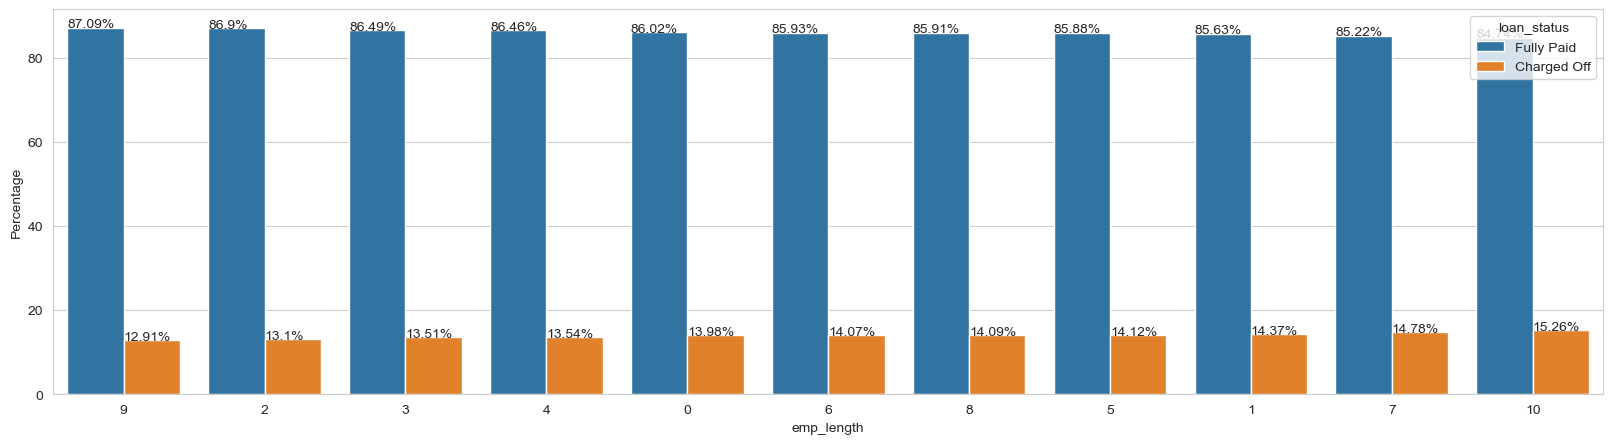

In [51]:
plot_percentage_bar(loan_data, 'emp_length', figsize=(20,5))

From above graph, we can see that employment length doesn't influence the defaulting much as all are around 13-15% range and 

Text(0.5, 1.0, 'Count of Loans by emp_length')

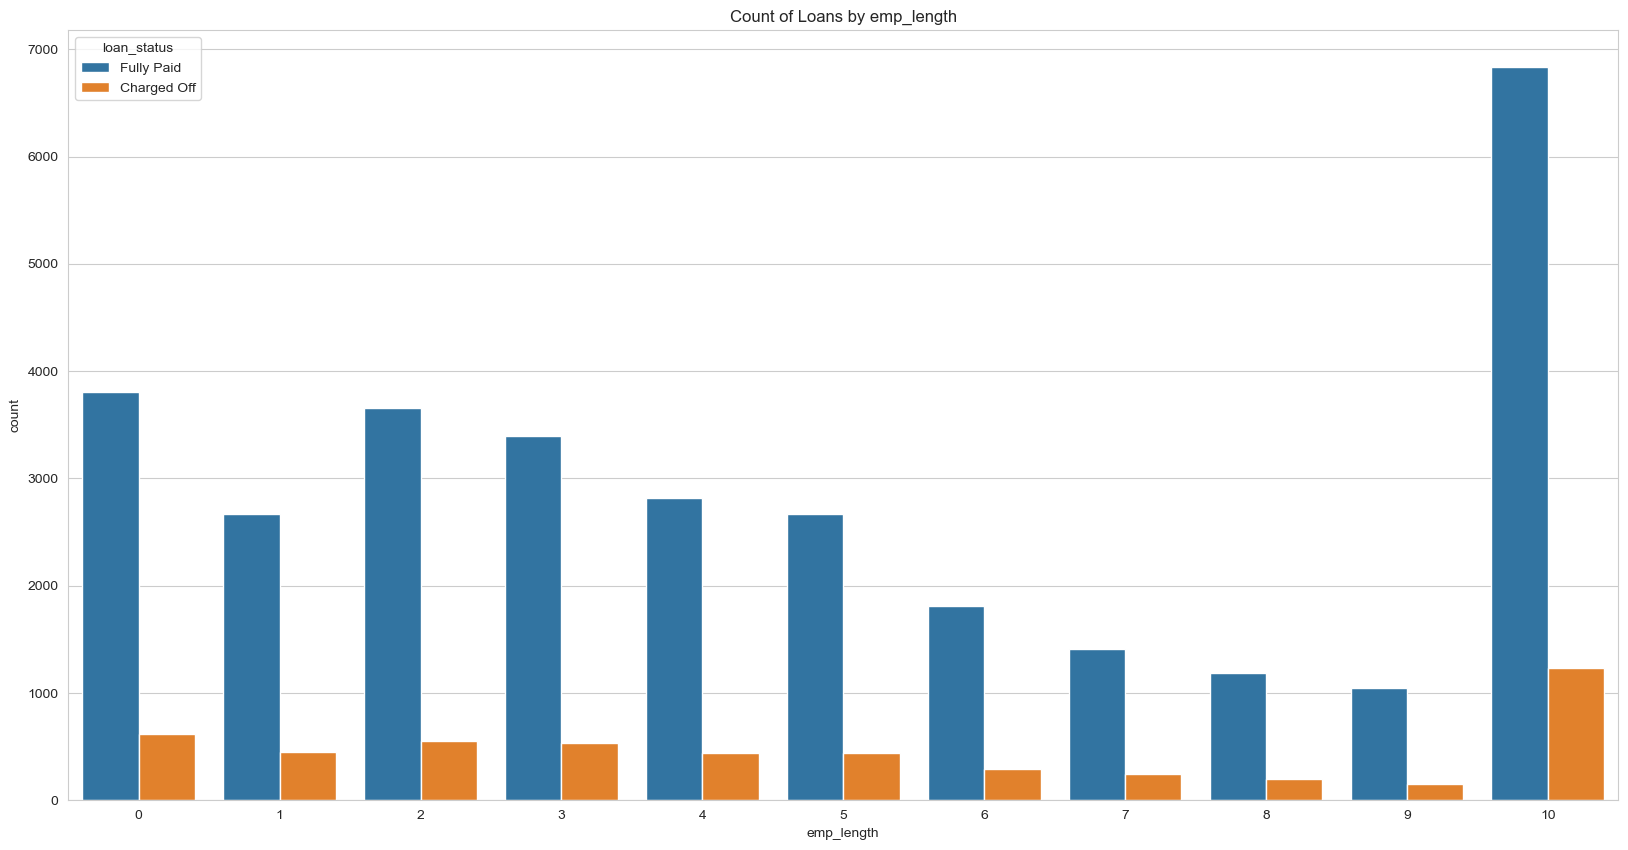

In [52]:
plt.figure(figsize=(20, 10))
sns.countplot(data=loan_data, x='emp_length', hue='loan_status')
plt.title('Count of Loans by emp_length')

From the above graph we can see that the number of loans taken by borrowers with 10+ years of experience is higher than others. But one reason could be the other ages are represented in buckets of 1 year span, and 10+ can include people with experience in more than 50+ years also.

Hence overall, emp_length is not really helpful in deciding whether the person is going to default or not.

### issue_year

Text(0.5, 1.0, 'Count of Loans by issue_year')

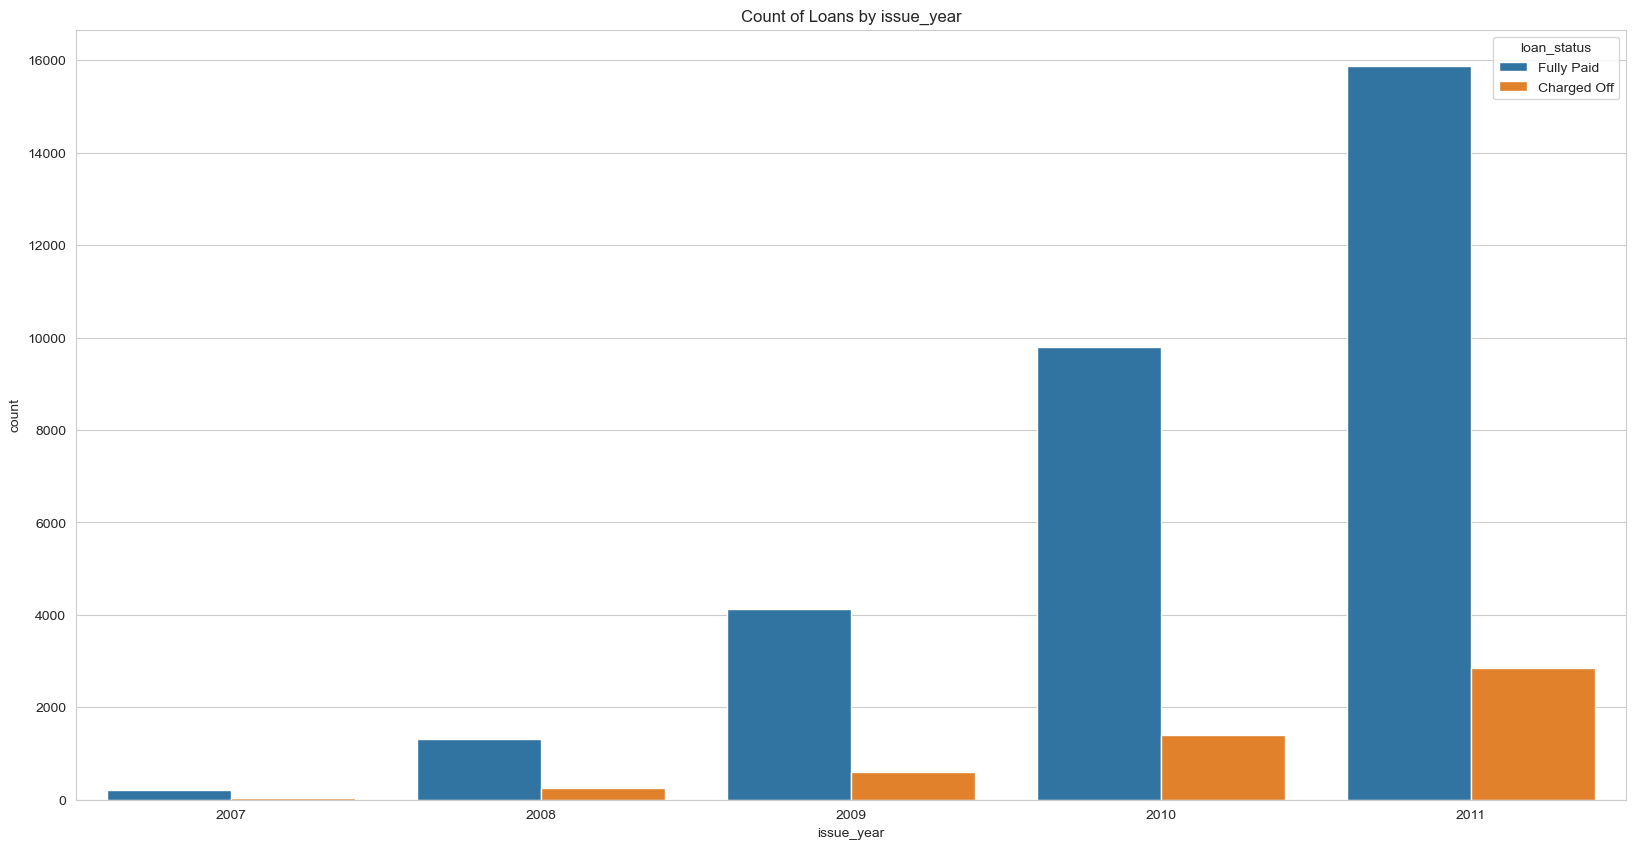

In [53]:
plt.figure(figsize=(20, 10))
sns.countplot(data=loan_data, x='issue_year', hue='loan_status')
plt.title('Count of Loans by issue_year')

From above graph, we can see that the number of people borrowing the loan is increasing every year.

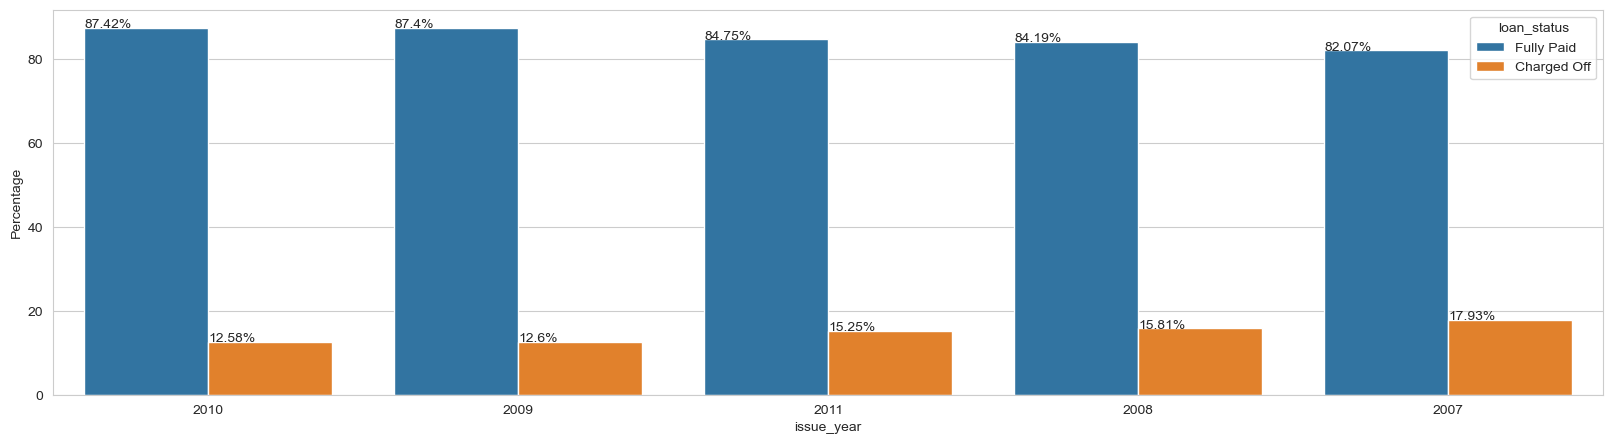

In [54]:
plot_percentage_bar(loan_data, 'issue_year', figsize=(20,5))

From the above graph we can see that the percentage of defaulters doesn't produce any useful patterns. This is highest in year 2007.

### issue_month

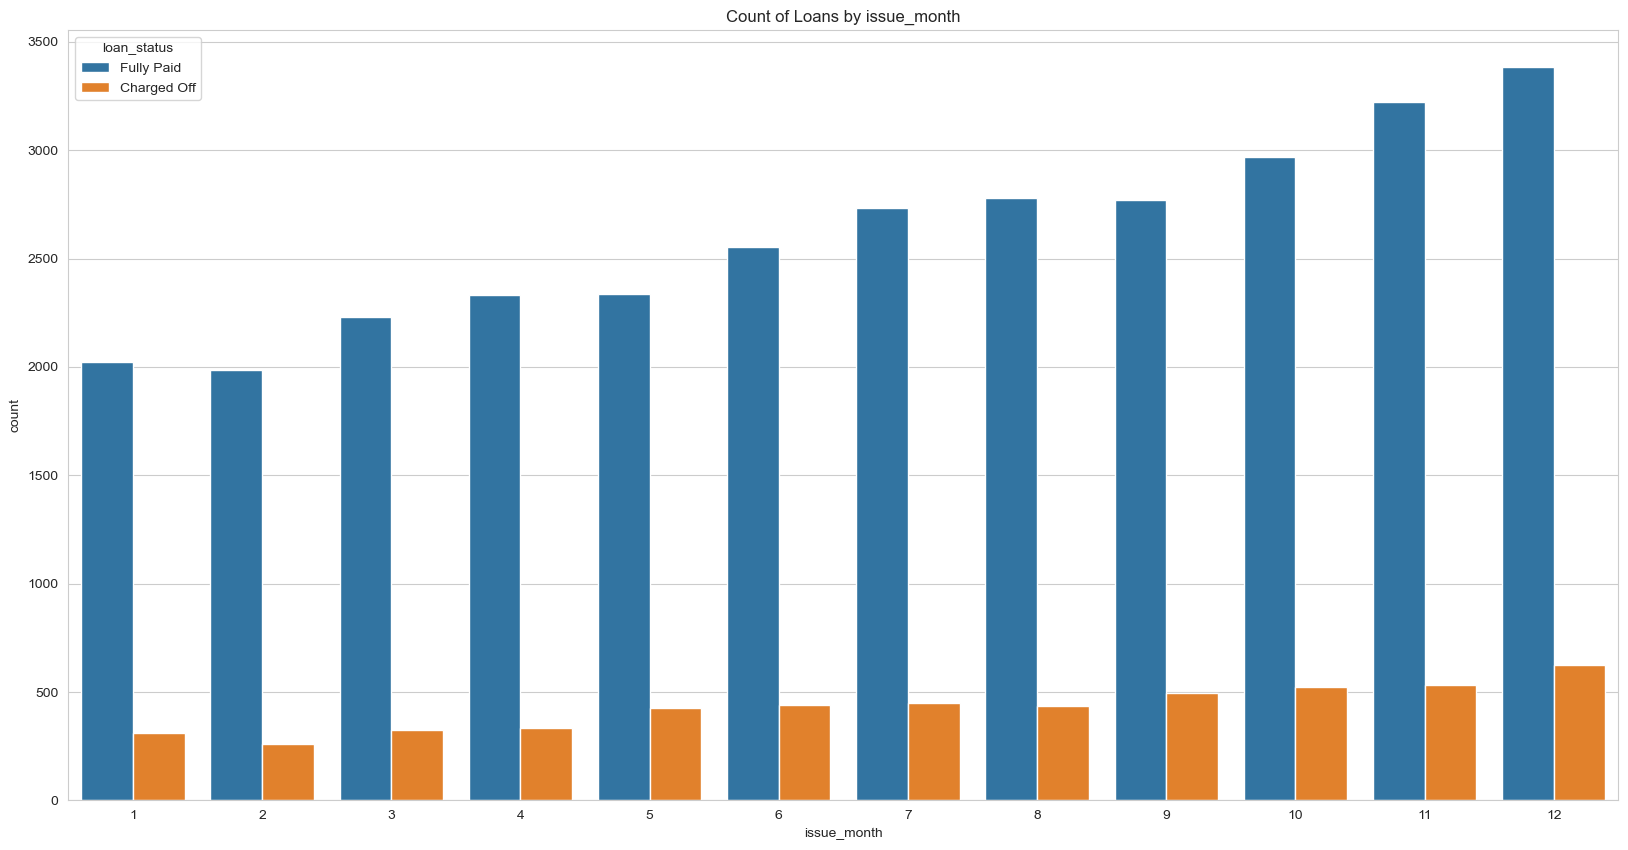

In [55]:
plt.figure(figsize=(20, 10))
sns.countplot(data=loan_data, x='issue_month', hue='loan_status')
plt.title('Count of Loans by issue_month')
plt.show()

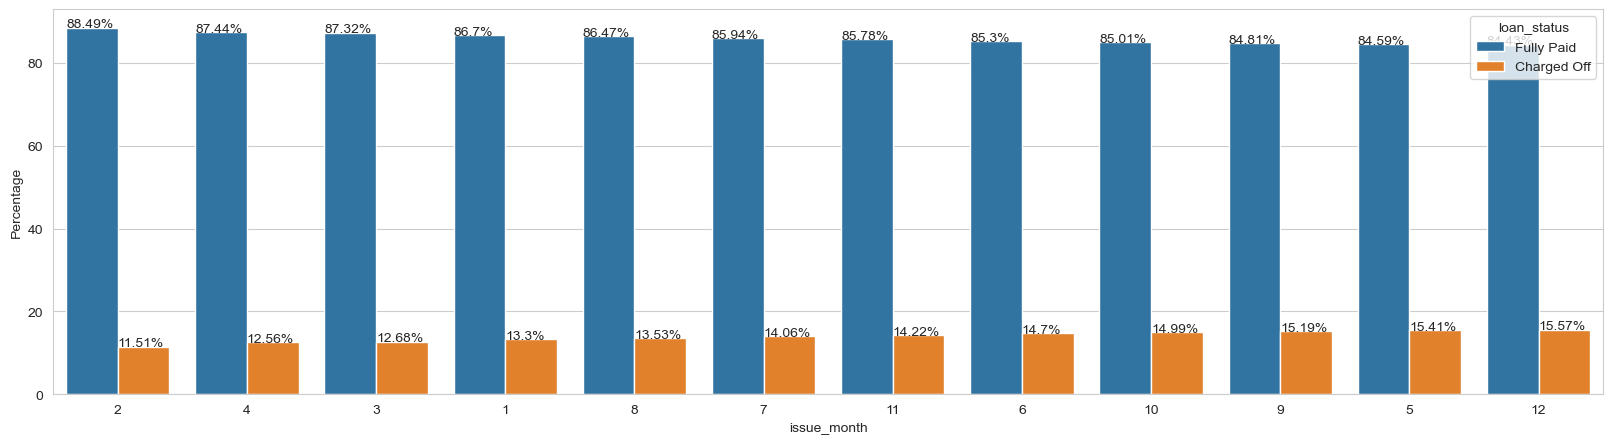

In [56]:
plot_percentage_bar(loan_data, 'issue_month', figsize=(20,5))

## loan_amnt

<Axes: xlabel='loan_amnt', ylabel='Count'>

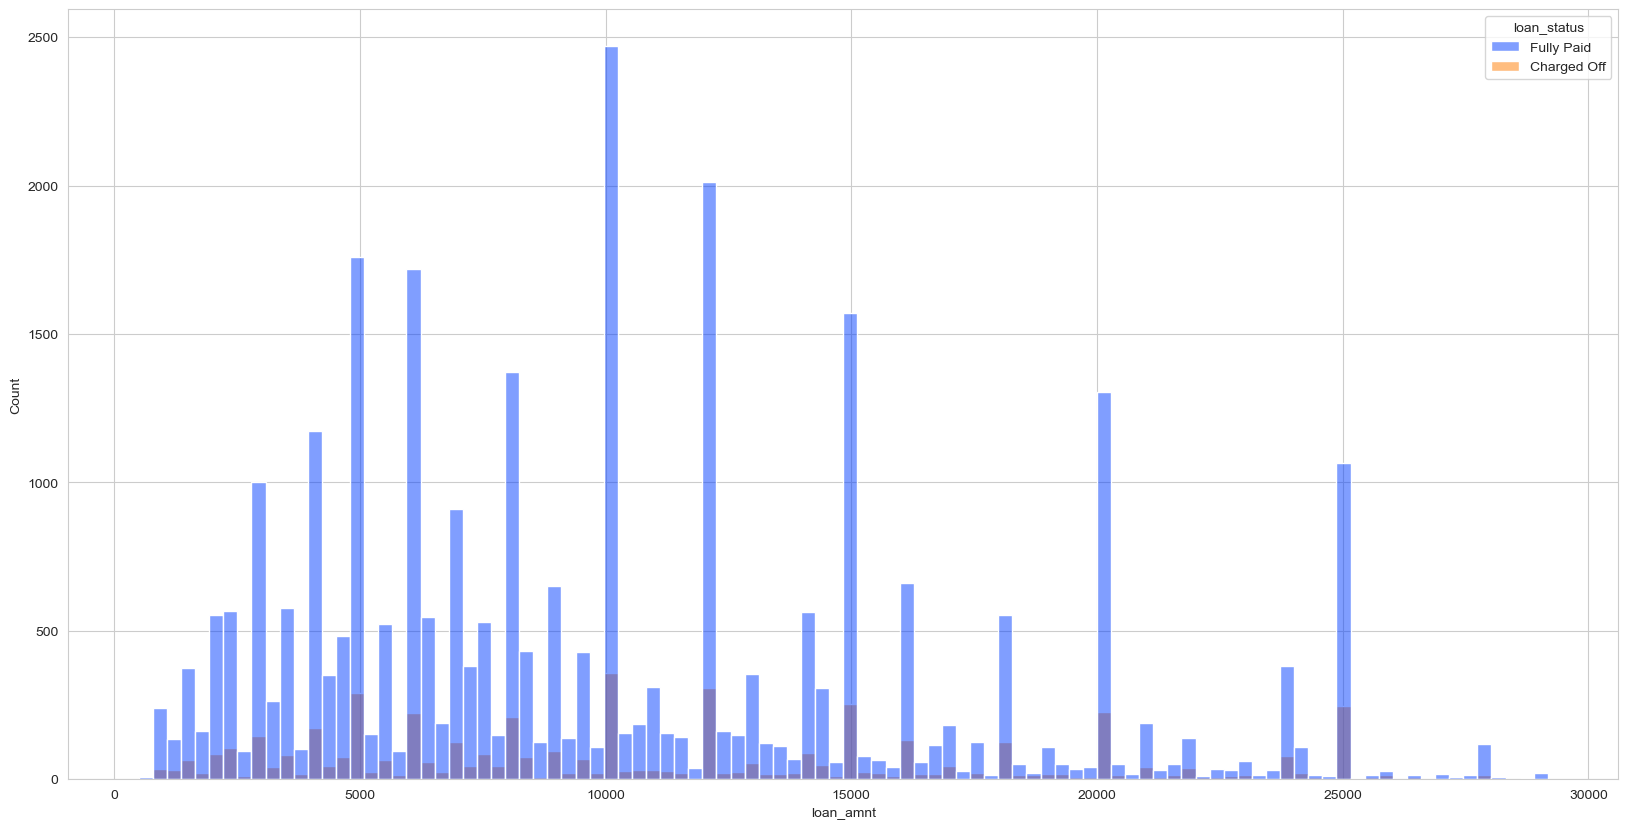

In [57]:
plt.figure(figsize=(20, 10))
sns.histplot(data=loan_data, x='loan_amnt', hue='loan_status', palette='bright', bins=100)



We can derive a new category based on range of loan amounts and use this for analysis.

In [58]:
# cliassifier function
def loan_amnt_bkt(loan_amount):
    if loan_amount <= 6000:
        return '0-6K'
    elif loan_amount <= 12000:
        return '6K-12K'
    elif loan_amount <= 18000:
        return '12K-18K'
    elif loan_amount <= 24000:
        return '18K-24K'
    elif loan_amount <= 30000:
        return '24K-30K'
    else:
        return '30K+'

# derived attribute
loan_data['loan_amnt_bkt'] = loan_data['loan_amnt'].apply(lambda x: loan_amnt_bkt(x))
loan_data['loan_amnt_bkt'].value_counts()

6K-12K     13132
0-6K       11797
12K-18K     6422
18K-24K     3303
24K-30K     1812
Name: loan_amnt_bkt, dtype: int64

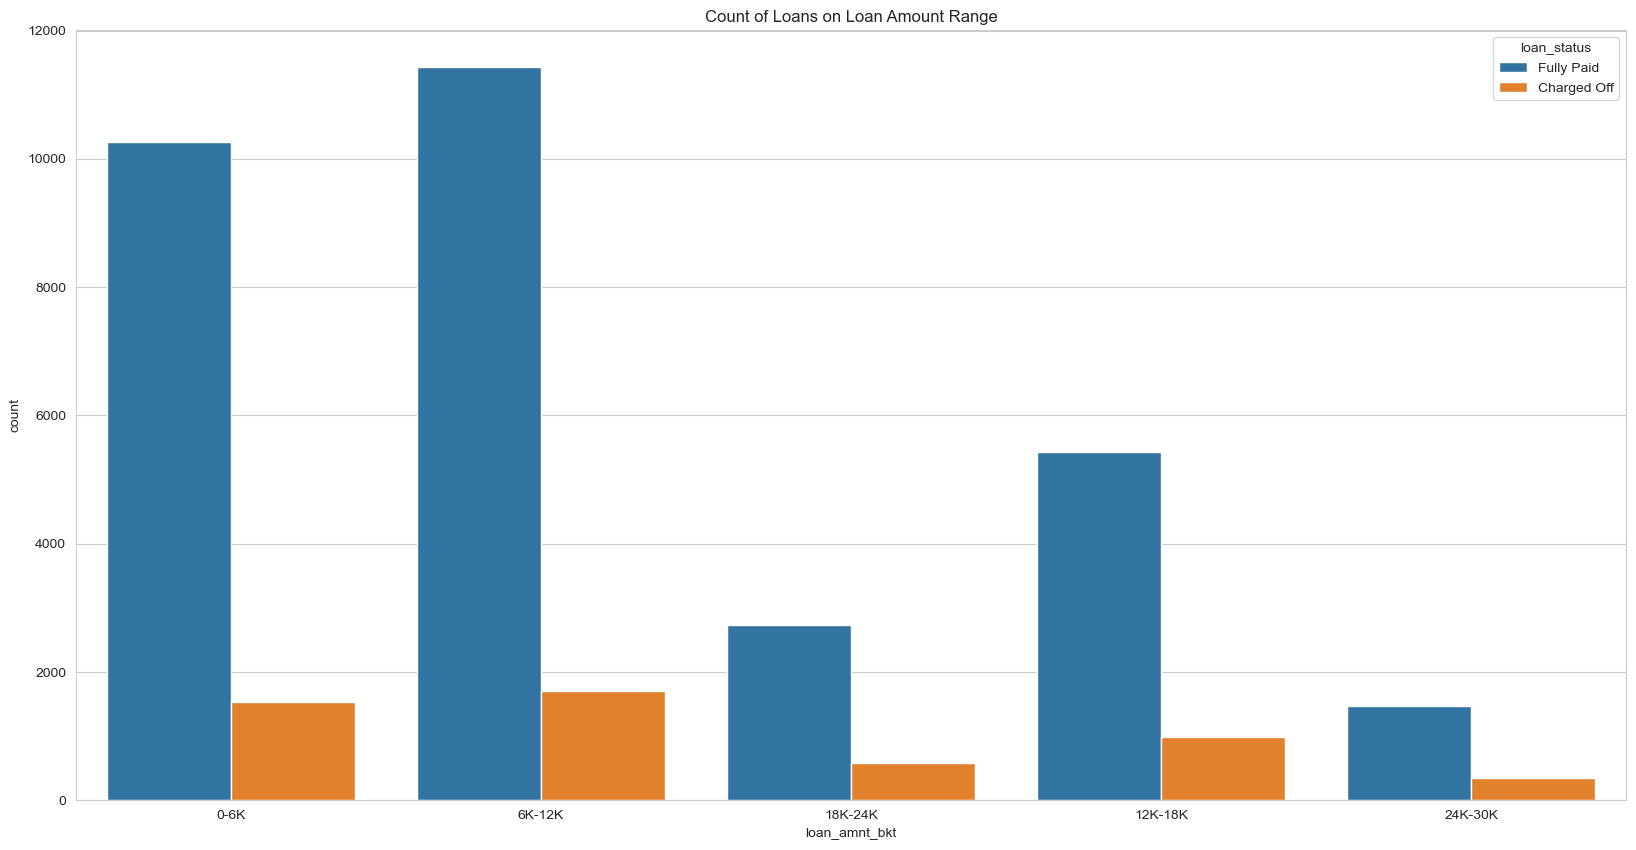

In [59]:
plt.figure(figsize=(20,10))
sns.countplot(data=loan_data, x='loan_amnt_bkt', hue='loan_status')
plt.title('Count of Loans on Loan Amount Range')
plt.show()

We can see that most of the loans are taken in the range of 6000-12000. This range also have the highest number of defaults.

Text(0.5, 1.0, 'Percentage of Loans on Loan Amount Range')

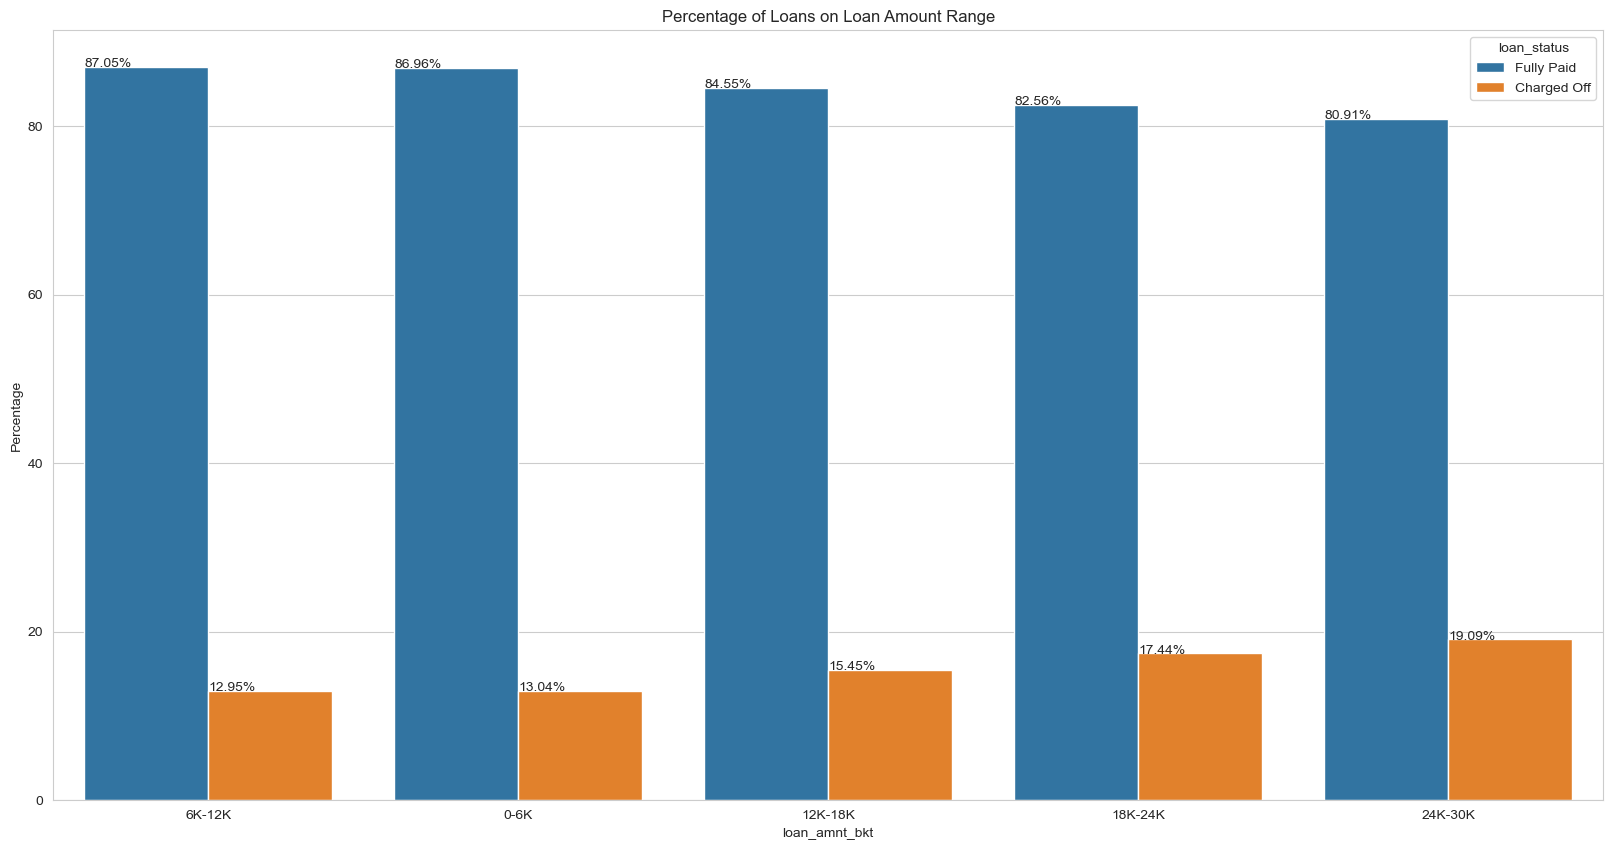

In [60]:
plot_percentage_bar(loan_data, 'loan_amnt_bkt', figsize=(20,10))
plt.title('Percentage of Loans on Loan Amount Range')

From the above percentage graph, we can see a trend that, the chance of defaulting increases as the amount increases.

### int_rate

<Axes: xlabel='int_rate', ylabel='Count'>

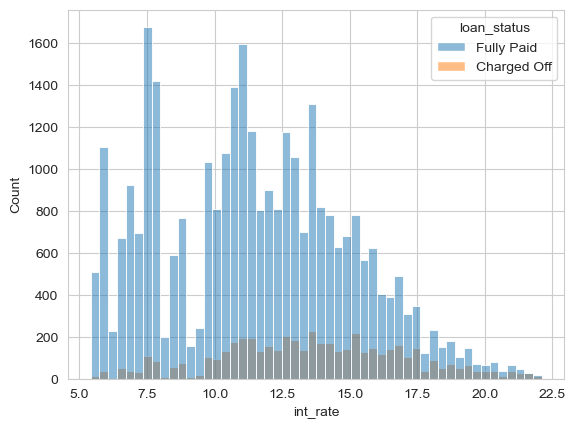

In [73]:
sns.histplot(data=loan_data, x='int_rate', hue='loan_status')

We can bucket the interest rates to analyse further

In [76]:
# Interest rate bucketing

def int_rate_bkt(int_rate):
    if int_rate <= 5.0:
        return '< 5.0'
    elif int_rate <= 7.5:
        return '5.0-7.5'
    elif int_rate <= 10.0:
        return '7.5-10.0'
    elif int_rate <= 12.5:
        return '10.0-12.5'
    elif int_rate <= 15.0:
        return '12.5-15.0'
    elif int_rate <= 17.5:
        return '15.0-17.5'
    elif int_rate <= 20.0:
        return '17.5-20.0'
    elif int_rate <= 22.5:
        return '20.0-22.5'
    else:
        return '22.5+'

loan_data['int_rate_bkt'] = loan_data['int_rate'].apply(lambda x: int_rate_bkt(x))

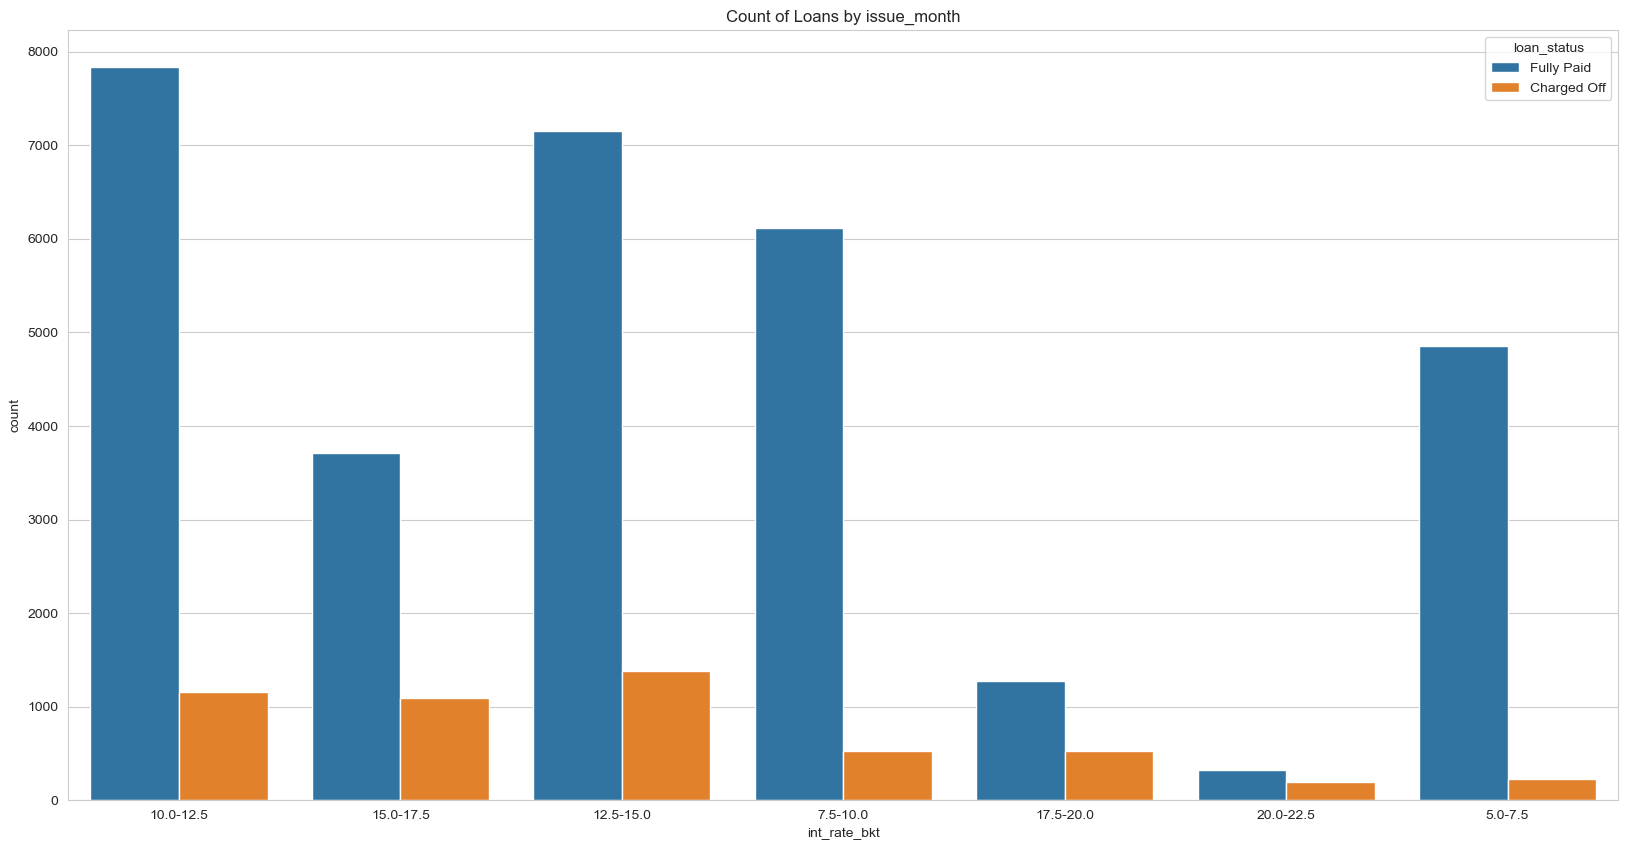

In [77]:
plt.figure(figsize=(20, 10))
sns.countplot(data=loan_data, x='int_rate_bkt', hue='loan_status')
plt.title('Count of Loans by int_rate')
plt.show()

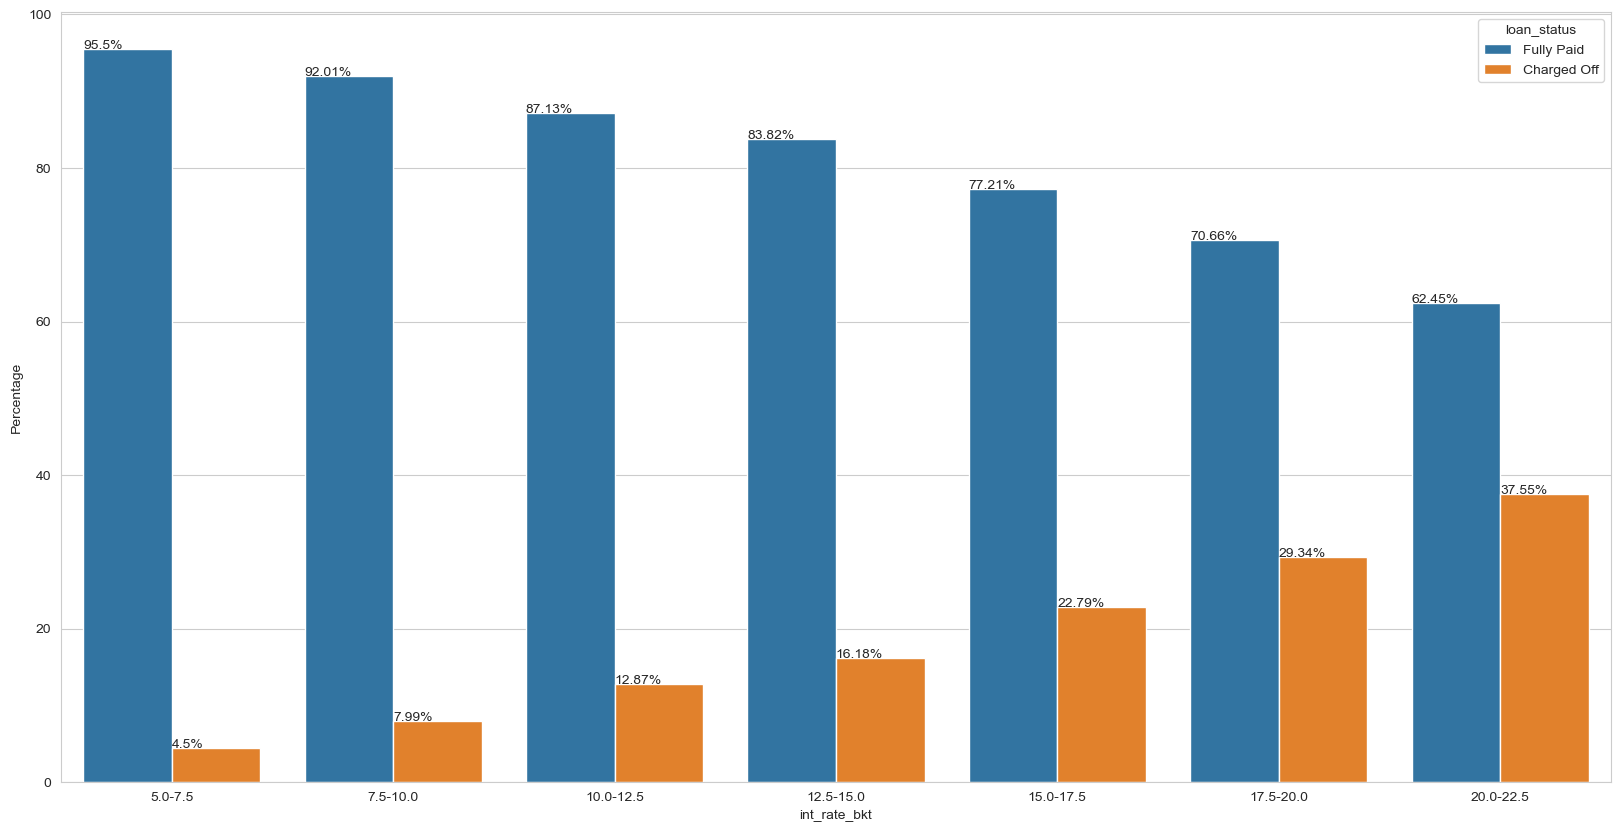

In [78]:
plot_percentage_bar(loan_data, 'int_rate_bkt', figsize=(20,10))

From the above chart, we can see that as interest rate increases, chances of defaulting increases.